In [184]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
from IPython.display import HTML
import matplotlib.patches as patches

In [229]:
dir= 'C:\\Users\\leduc\\My Drive\\Colab_Notebooks\\ResGCN_FPHAB\\fphab_data\\namData_39\\25_s_6_3.txt'
dir2="C:\\Users\\leduc\\Downloads\\skeleton.txt"

In [269]:
def readData(dir):
    lines = open(dir,'rt').read().strip().split('\n')
    skeleton_data=[]
    for l in lines:
        frame_data = np.array([float(v) for v in l.strip().split(' ')])
        frame_data = frame_data[1:]
        frame_data = np.reshape(frame_data,(21,3))
        skeleton_data.append(frame_data)
    skeleton_data=np.array(skeleton_data)
    
    #print(skeleton_data.shape)
    return skeleton_data

def readData2(dir):
    #lines = open(dir,'rt').read().strip().split('\n')
    #frame_num = int(len(lines) / 21)
    #frameDatas=[]
    #for frame in range(frame_num):
    #            frameData = skeletonData[(frame*21):(frame+1)*21]
    #            frameDatas.append(frameData)
    #frameDatas=np.array(frameDatas)
    data = np.zeros((100,21,3))
    with open(dir, 'r') as fr:
                skeletonData = fr.readlines()
                # data in format 'x\ty\tz' need to be split to format 'x,y,z'
                skeletonData = [item.split() for item in skeletonData]
                frame_num = int(len(skeletonData) / 21)
                for frame in range(frame_num):
                    if frame >= 100:
                        break
                    frameData = skeletonData[(frame*21):(frame+1)*21]
                    frameData_np=np.zeros((21,3))
                    for i,_ in enumerate(frameData):
                        frameData_np[i][0]=frameData[i][0]
                        frameData_np[i][1]=frameData[i][1]
                        frameData_np[i][2]=frameData[i][2]
                    frameData=np.array(frameData)
                    
                    reorder_idx = np.array([0, 1, 5, 9, 13, 17,2, 3, 4, 6, 7, 8, 10,11, 12, 14, 15, 16, 18, 19, 20])
                    frameData=frameData[reorder_idx]
      
                    hand_num = 1
                    #for hand in range(hand_num):
                    for joint in range(21):
                        data[frame,joint,0] = float(frameData[joint][0])
                        data[frame,joint,1] = float(frameData[joint][1])
                        data[frame,joint,2] = float(frameData[joint][2])

    return data

data3d=readData2(dir)
#data3d=readData(dir2)
predict_name='pour_wine'    

            
            

(100, 21, 3)
137.6267852783203 41.37904739379883


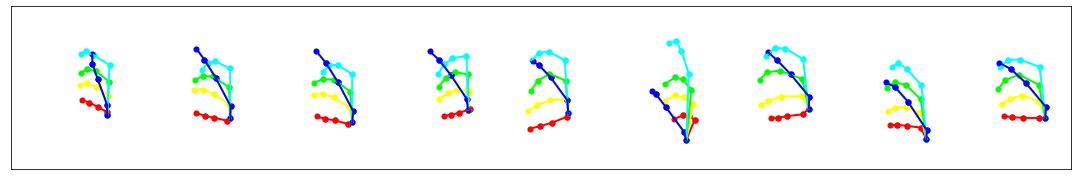

In [275]:
def _skel(data3D,step):
    seq = data3D
    fig = plt.figure(figsize=[19,3]) 
    ax = fig.add_subplot(111)
    lines = []
    sct=[]
    print(seq.shape)
    N = len(seq)
    data = np.array(list(range(0,N))).transpose()
    #joints order
    joints_order_org=[v-1 for v in [1,2,2,7,7,8,8,9,1,3,3,10,10,11,11,12,1,4,4,13,13,14,14,15,1,5,5,16,16,17,17,18,1,6,6,19,19,20,20,21]]
    joints_order = joints_order_org[::-1]
    #print(len(joints_order))
    skel = seq [0,:,:] 
    #color list
    c=[[0,0,255],[0,255,255],[0,255,0],[255,255,0],[255,0,0]]
    c.reverse()
    
    n_skels = int(100/step)
    for _ in range(n_skels):
        count_color,count= 0,1
        skel = data3D[step*_]
        for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
            xs, ys = [],[]
            xs=[(skel[id1,0]+100*_)/15+8*_,(skel[id2,0]+100*_)/15+8*_]
            ys=[150-skel[id1,1],150-skel[id2,1]]
            #print(xs,ys)
            line= plt.plot(xs,ys,color=np.array(c[count_color])/255.,lw=2)
            scatter=plt.scatter(xs,ys,color=np.array(c[count_color])/255.,lw=0.1)
          
            if(count%4==0):
                count_color+=1
            count+=1
            
            #lines.append(line)
            #sct.append(scatter)
    minx,miny=min(seq[0,:,0]),min(seq[0,:,1])
    maxx,maxy=max(seq[0,:,0])-minx,max(seq[0,:,1])-miny
    rect = patches.Rectangle((minx,miny),maxx, maxy, linewidth=1, edgecolor='green', facecolor='none',label="change")
    
    #ax.add_patch(rect)
    #text=ax.text(minx, maxy, predict_name)
    #text.set_bbox(dict(facecolor='green', alpha=0.5))
    plt.grid(True)
    print(seq[0,0,0],seq[0,0,1])
    plt.xlim(seq[0,0,0]-140,seq[0,0,0]-13)
    plt.ylim(100-seq[0,0,1]-0,300-seq[0,0,1]-50)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.savefig('est.eps')

    
_skel(data3d,11)

(100, 21, 3)
137.6267852783203 41.37904739379883


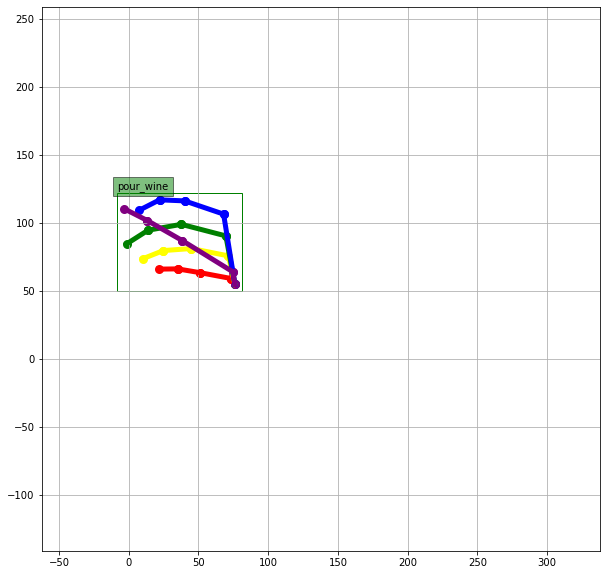

In [225]:
def anim_skel(data3D,predict_name):
    seq = data3D
    fig = plt.figure(figsize=[10,10]) 
    ax = fig.add_subplot(111)
    lines = []
    sct=[]
    print(seq.shape)
    N = len(seq)
    data = np.array(list(range(0,N))).transpose()
    #joints order
    joints_order_org=[v-1 for v in [1,2,2,7,7,8,8,9,1,3,3,10,10,11,11,12,1,4,4,13,13,14,14,15,1,5,5,16,16,17,17,18,1,6,6,19,19,20,20,21]]
    joints_order = joints_order_org[::-1]
    #print(len(joints_order))
    skel = seq [0,:,:] 
    #color list
    c=['purple','blue','green','yellow','red']
    c.reverse()
    count_color,count= 0,1

    for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
            xs, ys = [],[]
            xs=[skel[id1,0],skel[id2,0]]
            ys=[100-skel[id1,1],100-skel[id2,1]]
            line,= plt.plot(xs,ys,color=c[count_color],lw=5)
            scatter=plt.scatter(xs,ys,color=c[count_color],lw=3)
            if(count%4==0):
                count_color+=1
            count+=1
            lines.append(line)
            sct.append(scatter)
    minx,miny=min(seq[0,:,0]),min(seq[0,:,1])
    maxx,maxy=max(seq[0,:,0])-minx,max(seq[0,:,1])-miny
    rect = patches.Rectangle((minx,miny),maxx, maxy, linewidth=1, edgecolor='green', facecolor='none',label="change")
    
    ax.add_patch(rect)
    text=ax.text(minx, maxy, predict_name)
    text.set_bbox(dict(facecolor='green', alpha=0.5))
    plt.grid(False)
    print(seq[0,0,0],seq[0,0,1])
    plt.xlim(seq[0,0,0]-200,seq[0,0,0]+200)
    plt.ylim(100-seq[0,0,1]-200,100-seq[0,0,1]+200)
    #plt.text(rect,)

    plt.grid(True)
    def update(num,data, lines,sct,rect,text):
            for i,line in enumerate(lines):
                segment = np.zeros((2,2))
                joint_1 = joints_order[i*2]
                joint_2 = joints_order[i*2+1]
                #print(joint_1,joint_2)
                xs=[seq[num,joint_1,0],seq[num,joint_2,0]]
               
                ys=[100-seq[num,joint_1,1],100-seq[num,joint_2,1]]
                #print(xs,ys)
                data=np.hstack((xs,ys))
                data=data.reshape(2,2).transpose()
                #print(data)
                line.set_xdata(xs)
                line.set_ydata(ys)
                sct[i].set_offsets(data)
                
            minx,miny=min(seq[num,:,0])-5,min(100-seq[num,:,1])-5
            maxx,maxy=max(seq[num,:,0])-minx+5,max(100-seq[num,:,1])-miny+5
            rect.set_width(maxx)
            rect.set_height(maxy)
            rect.set_xy((minx,miny))
            text.set_position((rect.get_x(),rect.get_height()+3+rect.get_y()))

            #return lines, rect, sct
    anim = animation.FuncAnimation(fig, update, frames=N,fargs=(data,lines,sct,rect,text),interval=100,)            
    anim.save('t2.gif',  writer='pillow')
    #HTML(anim.to_html5_video())
    #anim.save('o.gif','pillow')
anim_skel(data3d,predict_name)

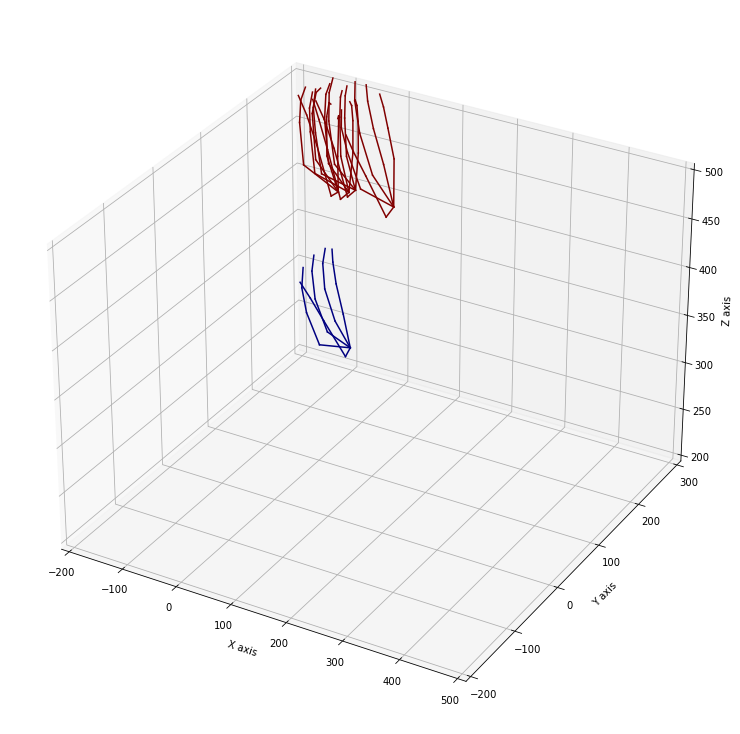

In [59]:
import cv2,matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from tqdm import tqdm
def plot_skel_v1(seq,step=5):   
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)

    joints_order_org=[v-1 for v in [1,2,2,7,7,8,8,9,1,3,3,10,10,11,11,12,1,4,4,13,13,14,14,15,1,5,5,16,16,17,17,18,1,6,6,19,19,20,20,21]]
    joints_order = joints_order_org[::-1]
    for i in range(seq.shape[0])[::step]:
        skel = seq[i]
        for id1,id2 in zip(joints_order[::2],joints_order[1::2]):
            xs, ys, zs = [], [], []
            xs=[skel[id1,0],skel[id2,0]]
            ys=[skel[id1,1],skel[id2,1]]
            zs=[skel[id1,2],skel[id2,2]]
    #         print xs,ys,zs
    #         print zs
            ax.plot(xs,ys,zs,color=plt.cm.jet(255*i/seq.shape[0]) )

    ax.set_xlim(-200, 500)
    ax.set_ylim(-200, 300)
    ax.set_zlim(200, 500)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
#     plt.show()
plot_skel_v1(data3d,20)
